In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/flower-color-images/FlowerColorImages.h5
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0203.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0014.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0129.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0194.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0045.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0071.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0048.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0070.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0171.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0051.png
/kaggle/input/flower-color-images/flower_images/__MACOSX/flower_images/._0033.png
/kaggle/input/flower-color-images/flower_im

In [2]:
classes = pd.read_csv('/kaggle/input/flower-color-images/flower_images/flower_images/flower_labels.csv')

In [3]:
classes.head()

,file,label
0,0001.png,0
1,0002.png,0
2,0003.png,2
3,0004.png,0
4,0005.png,0


In [4]:
import matplotlib.pyplot as plt

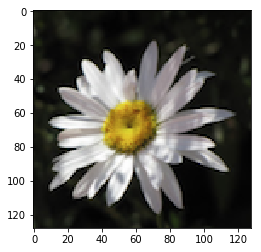

In [5]:
plt.imshow(plt.imread('/kaggle/input/flower-color-images/flower_images/flower_images/0112.png'), cmap='gray')

In [6]:
import os

In [7]:
# This is the path where all files are saved
len(os.listdir('/kaggle/input/flower-color-images/flower_images/flower_images/'))

212

In [8]:
import os
import shutil

In [9]:
pwd

'/kaggle/working'

In [10]:
os.makedirs('/kaggle/working/all_flowers/')
for i in os.listdir('/kaggle/input/flower-color-images/flower_images/flower_images/'):
    try:
        a = plt.imread('/kaggle/input/flower-color-images/flower_images/flower_images/'+i)
    except:
        pass
    else:
        plt.imsave('/kaggle/working/all_flowers/'+i, a)

!rm -rf /kaggle/working/all_flowers

In [11]:
for photo, label in list(zip(classes.file, classes.label)):
    try:
        os.listdir('/kaggle/working/flowers/'+str(label))
    except:
        os.makedirs('/kaggle/working/flowers/'+str(label))
    finally:
        shutil.copy('/kaggle/working/all_flowers/'+str(photo), 
                    '/kaggle/working/flowers/'+str(label))


In [12]:
import pathlib as pb

In [13]:
data_dir = pb.Path('/kaggle/working/flowers/')

In [14]:
# image count
len(list(data_dir.glob('*/*.png')))

210

In [15]:
class_names = classes.label.unique()
class_names = class_names.tolist()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, layers

Using TensorFlow backend.


In [17]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [18]:
image_data_gen = image_gen.flow_from_directory(data_dir, batch_size=1, shuffle=True,)

Found 210 images belonging to 10 classes.


In [19]:
def set_label(x):
    if x==0:
        ret=('phlox')
    elif x==1:
        ret=('rose')
    elif x==2:
        ret=('calendula')
    elif x==3:
        ret=('iris')
    elif x==4:
        ret=('leucanthemum maximum')
    elif x==5:
        ret=('bellflower')  
    elif x==6:
        ret=('viola')
    elif x==7:
        ret=('rudbeckia laciniata (Goldquelle)')
    elif x==8:
        ret=('peony')
    elif x==9:
        ret=('aquilegia')
        
    return ret

(256, 256, 3)


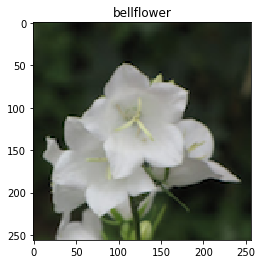

In [20]:
def show_image(img, label):
    plt.imshow(img, cmap='gray')
    label = set_label(np.argmax(label))
    plt.title((label))
    print(img.shape)
    
img, label = next(image_data_gen)
show_image(img[0], label)

In [21]:
image_data_gen = image_gen.flow_from_directory(data_dir, batch_size=32, shuffle=True,)

Found 210 images belonging to 10 classes.


In [22]:
del model
model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer='adam')

history = model.fit(image_data_gen, epochs=11)

NameError: name 'model' is not defined

In [23]:
model.summary()

NameError: name 'model' is not defined

In [24]:
model.evaluate(image_data_gen)

NameError: name 'model' is not defined